# ***Data Preprocessing & Cleaning*** 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

### Load Dataset

In [2]:
df = pd.read_csv("../data/raw/online_retail.csv")

### Dataset first look

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Duplicate value counts

In [5]:
df.duplicated().value_counts()

False    536641
True       5268
Name: count, dtype: int64

### Missing/Null values

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Describe dataset

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## ***Data Cleaning For the Customer Segmentation Model***

### For the Customer Segmentation Module
#### This module relies on RFM (Recency, Frequency, and Monetary) analysis, which requires the InvoiceDate, CustomerID, Quantity, and UnitPrice columns to calculate customer behavior metrics. The following data cleaning steps are essential:


- Handling Missing Values: Remove all rows where CustomerID is missing. The dataset inspection showed that there are a significant number of transactions (over 135,000) that are not linked to a specific customer, so these should be removed to ensure accurate customer-level analysis.


- Removing Canceled Invoices: Exclude all transactions where the InvoiceNo starts with the letter 'C'. These represent returns or cancellations and should not be included in the purchase history.


- Filtering Invalid Quantities and Prices: Remove rows where Quantity or UnitPrice are less than or equal to zero. This ensures that only valid purchase data is used for calculating total spend and frequency.

- Data Type Conversion: Convert the InvoiceDate column from its current object type to a datetime format. This is a critical step for accurately calculating the Recency metric, which is the time since a customer's last purchase.

### Dropping rows where CustomerID is missing

In [8]:
df_cleaned = df.dropna(subset=['CustomerID'])

In [9]:
df.dropna(subset=['CustomerID'], inplace=True)  

In [10]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Dropping duplicate values

In [11]:
df_cleaned = df.drop_duplicates()

In [12]:
df_cleaned.duplicated().value_counts()

False    401604
Name: count, dtype: int64

### Exclude canceled invoices by filtering out rows where 'InvoiceNo' starts with 'C' because these represent returns or cancellations and should not be considered as a purchase.

In [13]:
df_cleaned = df[~df['InvoiceNo'].str.startswith('C', na=False)]

### Remove rows with negative or zero quantities and prices

In [14]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

### Convert 'InvoiceDate' to datetime objects

In [15]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

### Get total price

In [16]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [17]:
df_cleaned.shape

(397884, 9)

In [18]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# ***Exploratory Data Analysis (EDA)***

## Transaction Volume by Country

In [19]:
country_transactions = df_cleaned.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index()
chart1 = alt.Chart(country_transactions).mark_bar().encode(
    x=alt.X('Country', sort='-y', title='Country'),
    y=alt.Y('InvoiceNo', title='Number of Transactions'),
    tooltip=[
        alt.Tooltip('Country', title='Country'),
        alt.Tooltip('InvoiceNo', title='Number of Transactions')
    ]
).properties(
    title='Transaction Volume by Country'
).interactive()

chart1.show()

chart1.save('../visuals/After_Cleaning/Customer_Segmentation/EDA/transaction_volume_by_country.json')

alt.Chart(...)

## Daily Purchase Trends

In [20]:
df_cleaned['InvoiceDateOnly'] = df_cleaned['InvoiceDate'].dt.date
daily_transactions = df_cleaned.groupby('InvoiceDateOnly')['InvoiceNo'].nunique().reset_index()

# Convert the date column to a string for Altair to serialize
daily_transactions['InvoiceDateOnly'] = daily_transactions['InvoiceDateOnly'].astype(str)

In [21]:
# Create a line chart for purchase trends over time
chart2 = alt.Chart(daily_transactions).mark_line().encode(
    x=alt.X('InvoiceDateOnly', title='Date'),
    y=alt.Y('InvoiceNo', title='Number of Transactions'),
    tooltip=[
        alt.Tooltip('InvoiceDateOnly', title='Date'),
        alt.Tooltip('InvoiceNo', title='Number of Transactions')
    ]
).properties(
    title='Daily Purchase Trends'
).interactive()

chart2.show()
chart2.save('../visuals/After_Cleaning/Customer_Segmentation/EDA/daily_purchase_trends.json')

alt.Chart(...)

##  Monetary Distribution

###  Monetary Distribution per Transaction

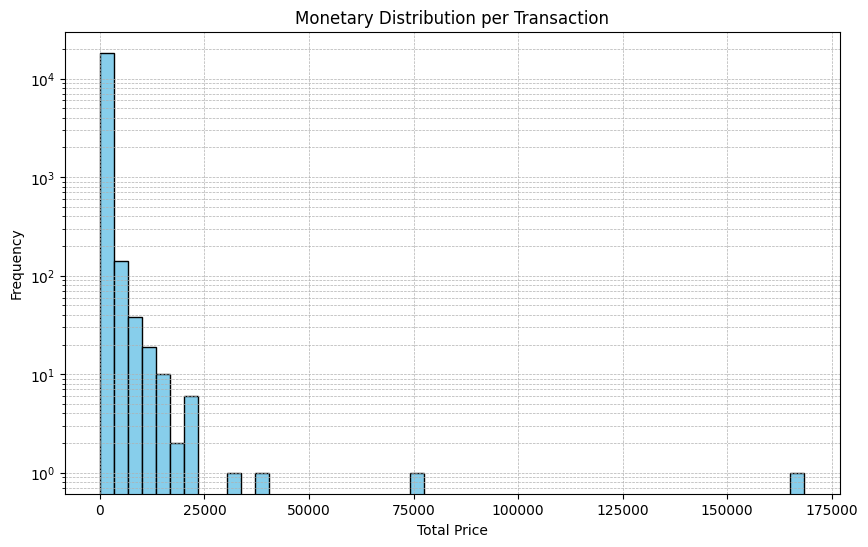

In [22]:
transaction_monetary = df_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(transaction_monetary['TotalPrice'], bins=50, color='skyblue', edgecolor='black')
ax.set_title('Monetary Distribution per Transaction')
ax.set_xlabel('Total Price')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('../visuals/After_Cleaning/Customer_Segmentation/EDA/monetary_distribution_per_transaction.png')

### Monetary Distribution per Customer

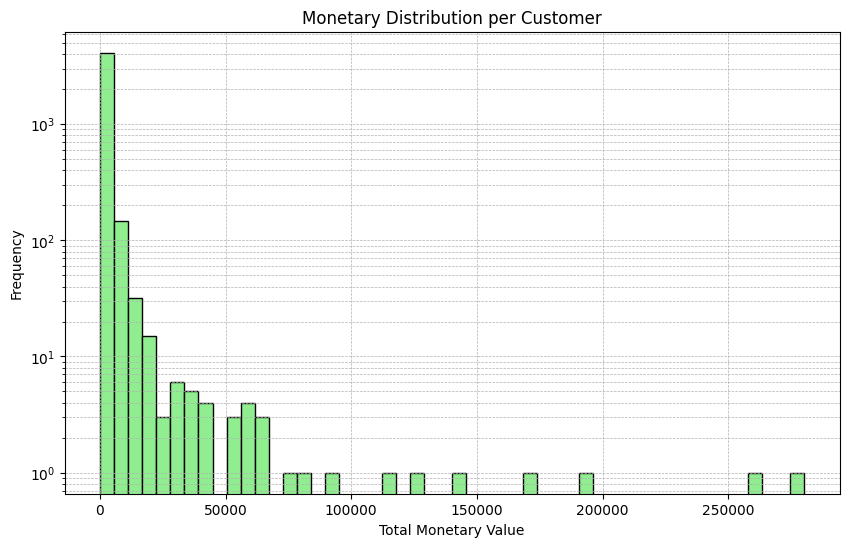

In [23]:
customer_monetary = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(customer_monetary['TotalPrice'], bins=50, color='lightgreen', edgecolor='black')
ax.set_title('Monetary Distribution per Customer')
ax.set_xlabel('Total Monetary Value')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('../visuals/After_Cleaning/Customer_Segmentation/EDA/monetary_distribution_per_customer.png')

# ***EDA Summary***

### Based on the Exploratory Data Analysis (EDA) performed, here is a summary of the findings, excluding the RFM analysis.

#### Data Preparation and Cleaning:
- The initial dataset was cleaned by removing rows with missing values in key columns such as CustomerID and Description. Duplicate entries were also removed, and transactions with a non-positive Quantity (which could represent returns) were filtered out. A new feature, TotalPrice, was created by multiplying the Quantity and UnitPrice for each transaction, enabling further monetary analysis.

#### Transaction Volume by Country:
- Analysis of the transaction volume by country revealed a highly concentrated customer base. The United Kingdom accounted for the vast majority of transactions, followed by a small number of other countries with significantly fewer transactions. This suggests that the business primarily operates within the UK market.

#### Purchase Trends Over Time:
- A visualization of daily purchase trends over the available period showed a fluctuating but generally upward trend in the number of daily transactions. This pattern can be useful for understanding seasonality and identifying periods of high and low activity.

#### Monetary Distribution:
- The distributions of monetary values were inspected at two levels: per transaction and per customer. Both distributions were found to be right-skewed, or long-tailed, indicating that a large number of transactions and customers involve smaller monetary values, while a small number of transactions and customers are associated with very high spending. This insight is crucial for understanding the overall spending habits of the customer base and identifying high-value customers.

### Saving Cleaned Data

In [24]:
Customer_Segementation = df_cleaned

In [25]:
Customer_Segementation.to_csv('../data/processed/Customer_Segmentation/Customer_Segementation.csv', index=False)

# ***Data Cleaning and Feature Engineering For the Recommendation Model***

In [26]:
df_cleaned.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
TotalPrice         0
InvoiceDateOnly    0
dtype: int64

### Extract Temporal Features

In [27]:
Recommendation_df = df_cleaned

In [28]:
# Extract Temporal Features
Recommendation_df['InvoiceDayOfWeek'] = Recommendation_df['InvoiceDate'].dt.day_name()
Recommendation_df['InvoiceMonth'] = Recommendation_df['InvoiceDate'].dt.month_name()
Recommendation_df['InvoiceHour'] = Recommendation_df['InvoiceDate'].dt.hour

### Calculate RFM Features (Recency, Frequency, Monetary)
### Define a reference date as one day after the last transaction date

In [29]:
reference_date = Recommendation_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM
rfm_df = Recommendation_df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (reference_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("\nRFM features calculated. Preview of RFM DataFrame:")
print(rfm_df.head())


RFM features calculated. Preview of RFM DataFrame:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


#  ***Univariate Analysis***

### Distribution of Customer Activity (Frequency)

In [30]:
customer_activity_dist = rfm_df['Frequency'].value_counts().sort_index().head(20)
print("\nTop 20 most frequent number of purchases per customer:")
print(customer_activity_dist)


Top 20 most frequent number of purchases per customer:
Frequency
1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
11      52
12      45
13      30
14      20
15      28
16      11
17      18
18      14
19      12
20      12
Name: count, dtype: int64


### Distribution of Product Popularity

In [31]:
product_popularity = Recommendation_df['Description'].value_counts().head(10)
print("\nTop 10 most popular products:")
print(product_popularity)


Top 10 most popular products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64


# ***Exploratory Data Analysis (EDA)***

## Distribution of Monetary Value (Histograms)

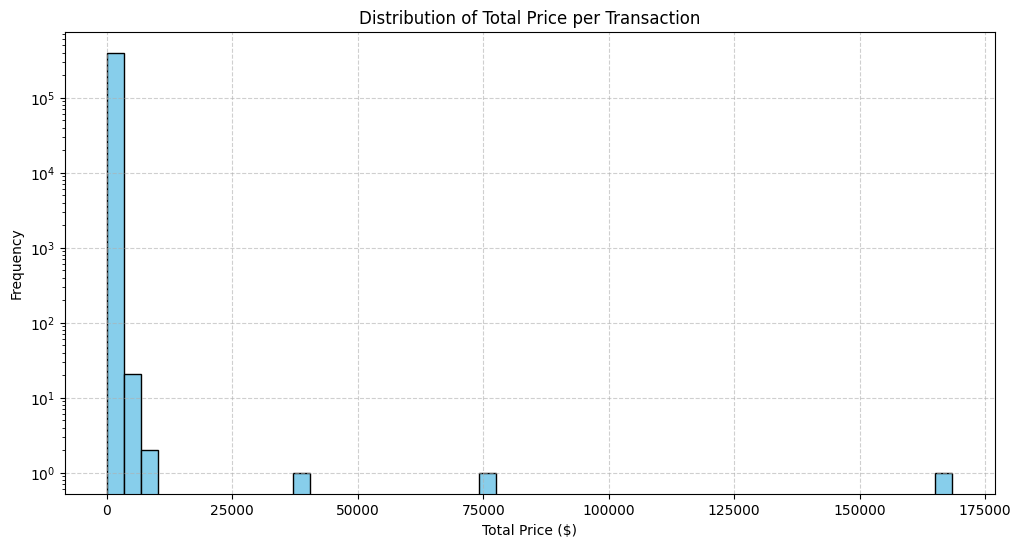

In [32]:
plt.figure(figsize=(12, 6))
plt.hist(Recommendation_df['TotalPrice'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Price per Transaction')
plt.xlabel('Total Price ($)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('../visuals/After_Cleaning/Recommendation_Model/EDA/total_price_distribution.png')
plt.show()
plt.close()

### Distribution of Total Monetary Value per Customer

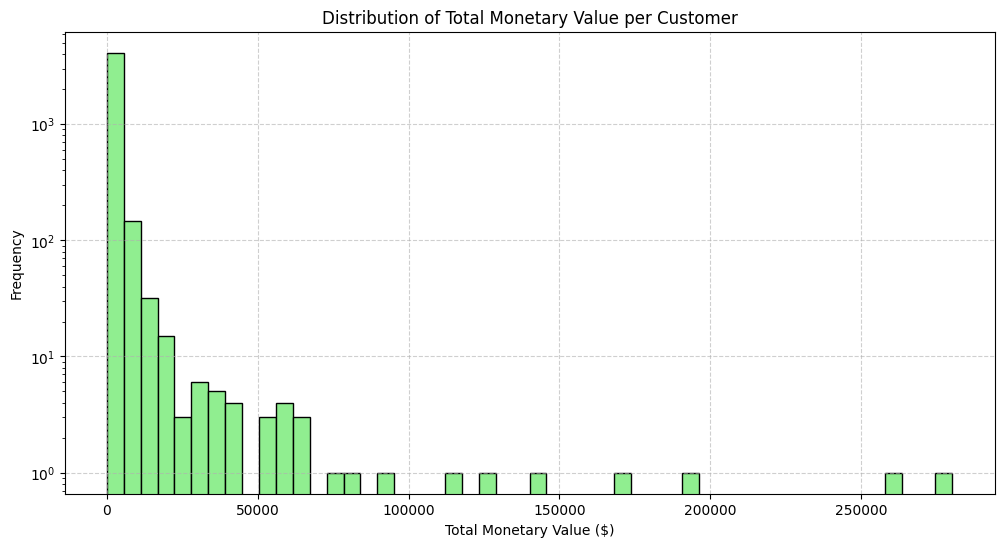

In [33]:
plt.figure(figsize=(12, 6))
plt.hist(rfm_df['Monetary'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Monetary Value per Customer')
plt.xlabel('Total Monetary Value ($)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('../visuals/After_Cleaning/Recommendation_Model/EDA/customer_monetary_distribution.png')
plt.show()
plt.close()

### Geographical Analysis

In [34]:
country_transactions = Recommendation_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
print("\nTop 10 countries by number of transactions:")
print(country_transactions.head(10))


Top 10 countries by number of transactions:
Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Netherlands          94
Spain                90
Portugal             57
Australia            57
Switzerland          51
Name: InvoiceNo, dtype: int64


# ***Bivariate and Multivariate Analysis***

### Time-Series Analysis: Daily Transaction Volume

In [35]:
daily_transactions = Recommendation_df.groupby(Recommendation_df['InvoiceDate'].dt.date)['InvoiceNo'].nunique().reset_index()
daily_transactions.columns = ['Date', 'Transactions']

### Convert date to string for Altair compatibility

In [36]:
daily_transactions['Date'] = daily_transactions['Date'].astype(str)

### Create an interactive line chart with Altair

In [37]:
line_chart = alt.Chart(daily_transactions).mark_line().encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Transactions:Q', title='Number of Transactions'),
    tooltip=[
        alt.Tooltip('Date', title='Date'),
        alt.Tooltip('Transactions', title='Number of Transactions')
    ]
).properties(
    title='Daily Transaction Volume Over Time'
).interactive()
line_chart.show()
line_chart.save('../visuals/After_Cleaning/Recommendation_Model/EDA/daily_transaction_volume.json')

alt.Chart(...)

## Customer-Product Relationship (Simple Market Basket Analysis)

### Find pairs of products purchased together most frequently

In [39]:
from collections import defaultdict
from itertools import combinations

In [40]:
product_pairs = Recommendation_df.groupby('InvoiceNo')['Description'].apply(list)

# Count pair frequencies
frequent_pairs = defaultdict(int)

for products in product_pairs:
    unique_products = sorted(set(products))  # Optional: remove duplicates per invoice
    for pair in combinations(unique_products, 2):
        frequent_pairs[pair] += 1

# Get top 5 most frequent pairs
top_pairs = sorted(frequent_pairs.items(), key=lambda item: item[1], reverse=True)[:5]

# Display results
print("\nTop 5 most frequently purchased product pairs:")
for (prod1, prod2), count in top_pairs:
    print(f"  - {prod1} & {prod2}: {count} times")


Top 5 most frequently purchased product pairs:
  - JUMBO BAG PINK POLKADOT & JUMBO BAG RED RETROSPOT: 546 times
  - GREEN REGENCY TEACUP AND SAUCER & ROSES REGENCY TEACUP AND SAUCER : 541 times
  - ALARM CLOCK BAKELIKE GREEN & ALARM CLOCK BAKELIKE RED : 530 times
  - LUNCH BAG PINK POLKADOT & LUNCH BAG RED RETROSPOT: 523 times
  - LUNCH BAG  BLACK SKULL. & LUNCH BAG RED RETROSPOT: 517 times


## Save Recommendation Dataset

In [41]:
Recommendation_df.to_csv('../data/processed/Recommendation/Recommendation_model.csv',index=False)

## Summary: Frequent Product Pair Analysis
This analysis identifies the top 5 most frequently purchased product pairs from transactional data in Recommendation_df. Here's how it works:

### Grouping by Invoice:
- All products bought together in each invoice (InvoiceNo) are grouped into lists using the Description field.

### Generating Product Pairs:
- For each invoice, unique product combinations (pairs) are generated using itertools.combinations, ensuring no duplicate pairs per invoice.

### Counting Frequency:
- A defaultdict is used to count how many times each product pair appears across all invoices, making the counting efficient.

### Sorting and Selection:
- The product pairs are sorted in descending order of frequency, and the top 5 most frequent pairs are selected.

### Output:
- The script prints out the top 5 pairs with the number of times they were purchased together.